In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('bcgx_data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling


In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [7]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Evaluation


In [8]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [9]:
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [10]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")
print(f"F1 Score: {metrics.f1_score(y_test, predictions)}")

True positives: 18
False positives: 4
True negatives: 3282
False negatives: 348

Accuracy: 0.9036144578313253
Precision: 0.8181818181818182
Recall: 0.04918032786885246
F1 Score: 0.09278350515463918


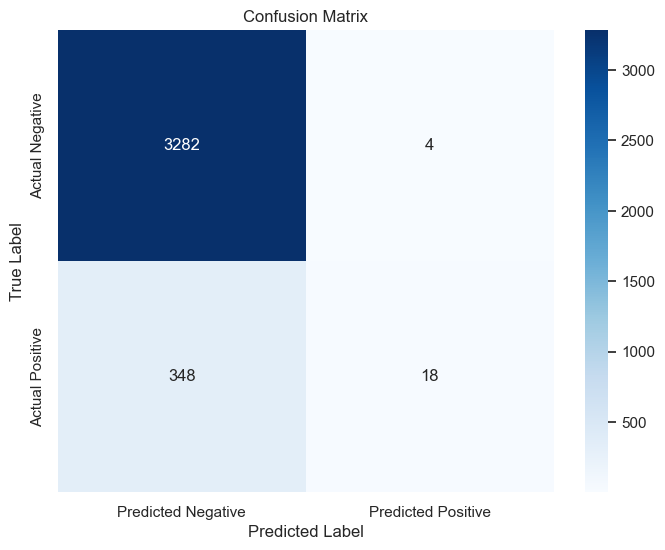

In [11]:
# Reconstruct the confusion matrix 
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

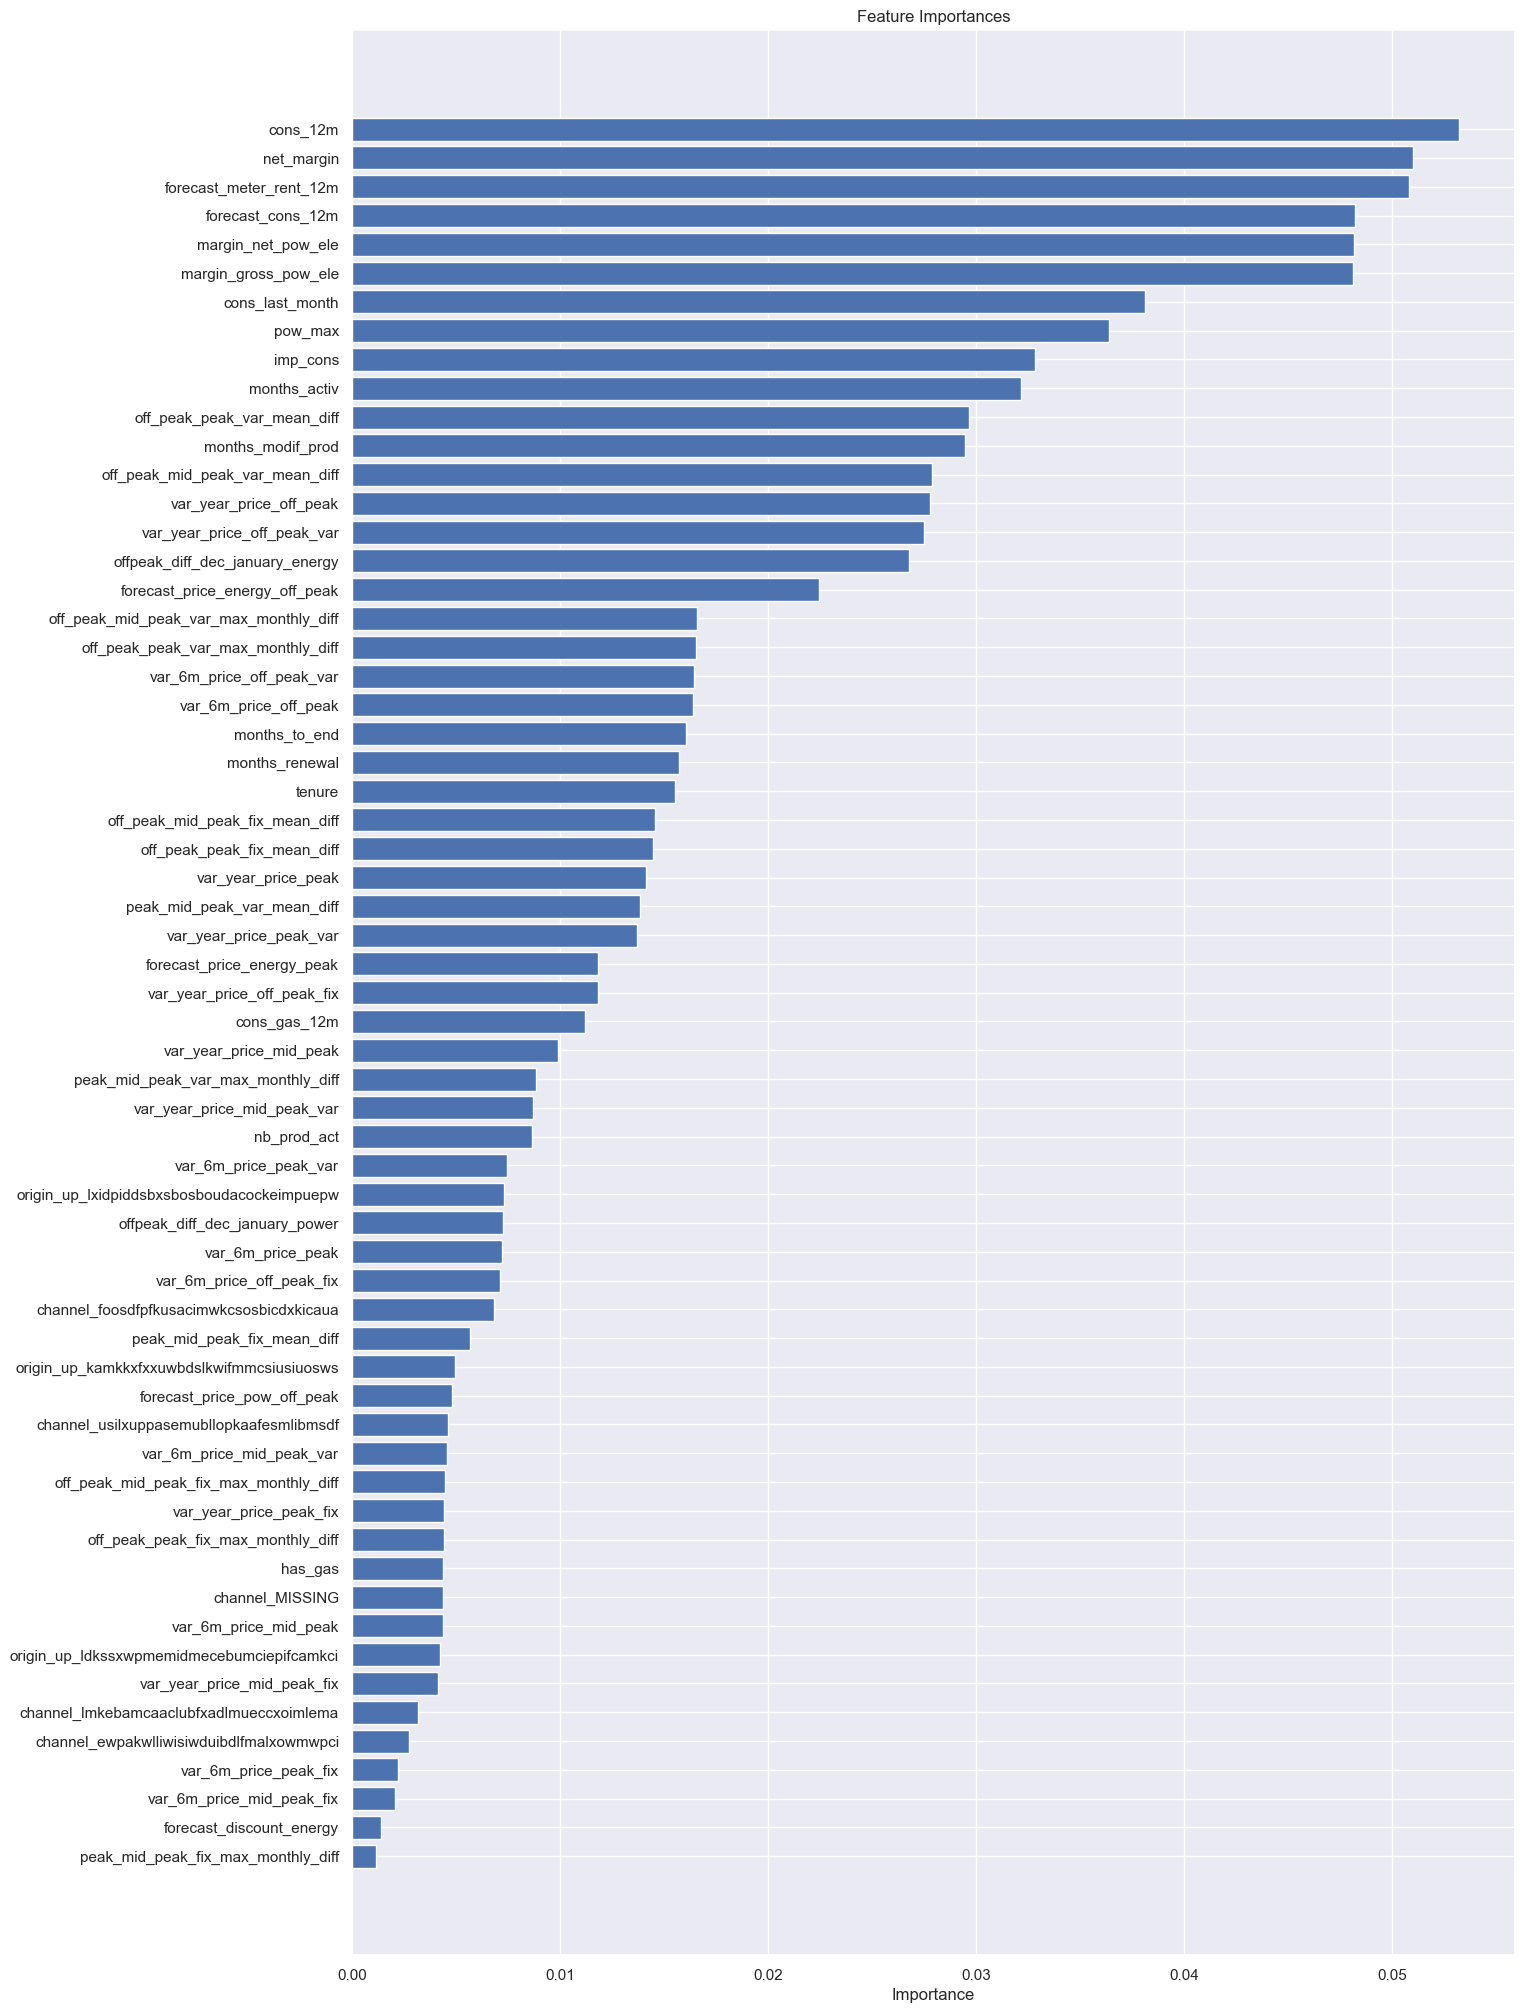

In [12]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [13]:
# proba_predictions = model.predict_proba(X_test)
# probabilities = proba_predictions[:, 1]

In [14]:
# X_test = X_test.reset_index()
# X_test.drop(columns='index', inplace=True)

In [15]:
# X_test['churn'] = predictions.tolist()
# X_test['churn_probability'] = probabilities.tolist()

### Attention
This task does not take into account that our target variable is un-balanced. We should try using "BalancedRandomForestClassifier" to adress this issue.

<Axes: >

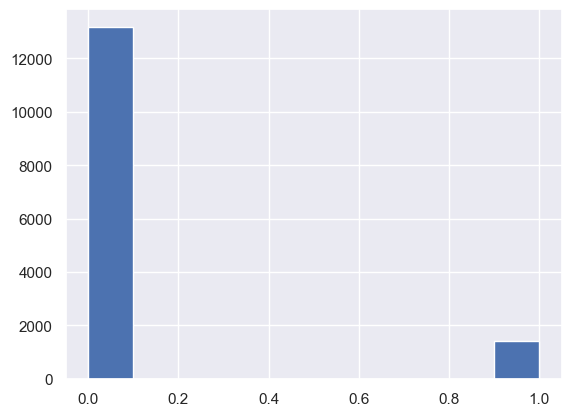

In [16]:
y.hist()

In [21]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

model = BalancedRandomForestClassifier(
    n_estimators=1000,  # Number of trees in the forest
    random_state=42,     # Seed for reproducibility (optional)
    sampling_strategy='not minority',  # Balances the class distribution by under-sampling the majority class
    replacement=False,   # Whether to sample with replacement (default=False)
    bootstrap=True,      # Whether to use bootstrap samples (default=True)
    n_jobs=-1           # Use all available CPU cores for training
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Balanced Accuracy: 0.6252639946253189

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77      3286
           1       0.16      0.60      0.25       366

    accuracy                           0.65      3652
   macro avg       0.55      0.63      0.51      3652
weighted avg       0.86      0.65      0.72      3652



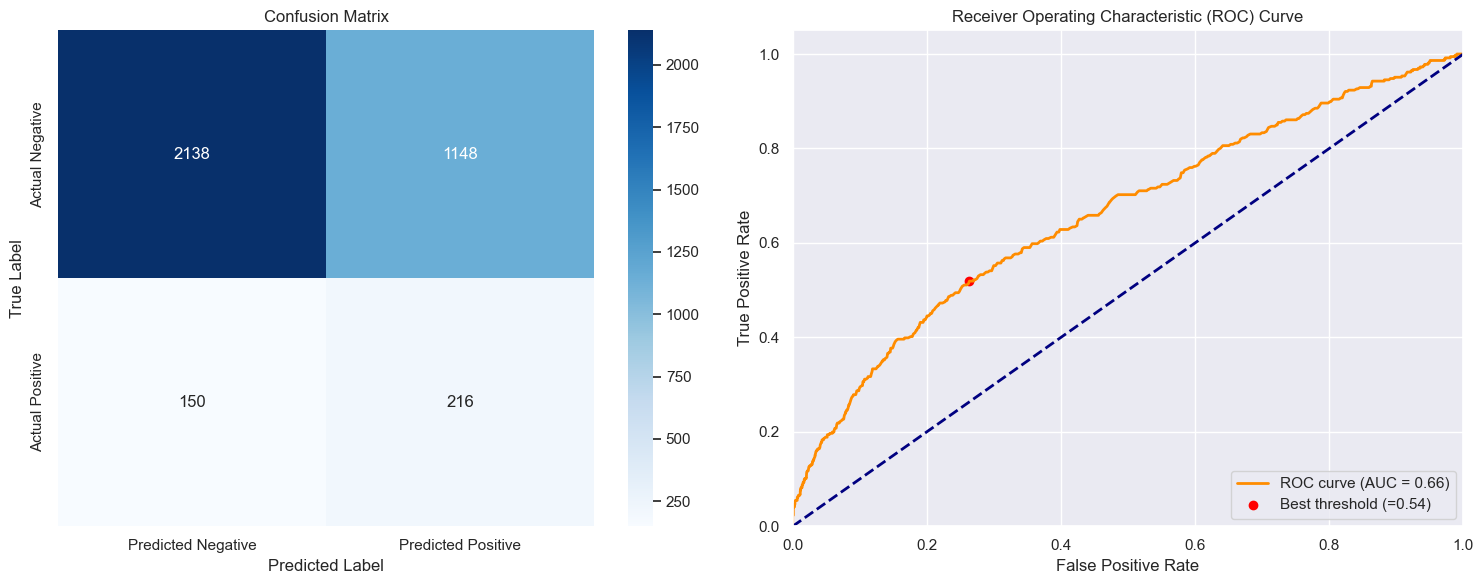


Optimal threshold: 0.5390

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      3286
           1       0.18      0.52      0.27       366

    accuracy                           0.71      3652
   macro avg       0.56      0.63      0.55      3652
weighted avg       0.86      0.71      0.77      3652



In [27]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# 1. Plot Confusion Matrix
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. Plot ROC Curve and find optimal threshold
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

# Calculate the best threshold (Youden's J statistic)
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label=f'Best threshold (={best_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print the optimal threshold
print(f"\nOptimal threshold: {best_threshold:.4f}")

# Evaluate model with optimal threshold
y_pred_optimal = (y_pred_proba >= best_threshold).astype(int)
print("\nClassification Report with Optimal Threshold:")
print(metrics.classification_report(y_test, y_pred_optimal))

Starting cross-validation...
Processing fold 1/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 1 - Best threshold: 0.640, F1-score: 0.276
Processing fold 2/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 2 - Best threshold: 0.580, F1-score: 0.280
Processing fold 3/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 3 - Best threshold: 0.580, F1-score: 0.326
Processing fold 4/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 4 - Best threshold: 0.560, F1-score: 0.286
Processing fold 5/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 5 - Best threshold: 0.690, F1-score: 0.337
Processing fold 6/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 6 - Best threshold: 0.560, F1-score: 0.282
Processing fold 7/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 7 - Best threshold: 0.580, F1-score: 0.337
Processing fold 8/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 8 - Best threshold: 0.660, F1-score: 0.320
Processing fold 9/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 9 - Best threshold: 0.550, F1-score: 0.288
Processing fold 10/10


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Fold 10 - Best threshold: 0.660, F1-score: 0.363

Cross-validation completed. Average F1-score: 0.309

Training final model on all training data...


C:\Users\gpari\AppData\Roaming\Python\Python311\site-packages\imblearn\ensemble\_forest.py:825: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Using average optimal threshold: 0.606

Enhanced Balanced Random Forest with Threshold Tuning:
              precision    recall  f1-score   support

           0      0.925     0.853     0.887      3286
           1      0.222     0.377     0.279       366

    accuracy                          0.805      3652
   macro avg      0.573     0.615     0.583      3652
weighted avg      0.854     0.805     0.826      3652


Standard Balanced Random Forest (for comparison):
              precision    recall  f1-score   support

           0      0.933     0.657     0.771      3286
           1      0.158     0.579     0.249       366

    accuracy                          0.650      3652
   macro avg      0.546     0.618     0.510      3652
weighted avg      0.856     0.650     0.719      3652


Calculating feature importance...
Top 10 most important features:
                               feature  importance
11                margin_gross_pow_ele    0.158950
12                  margin_net_

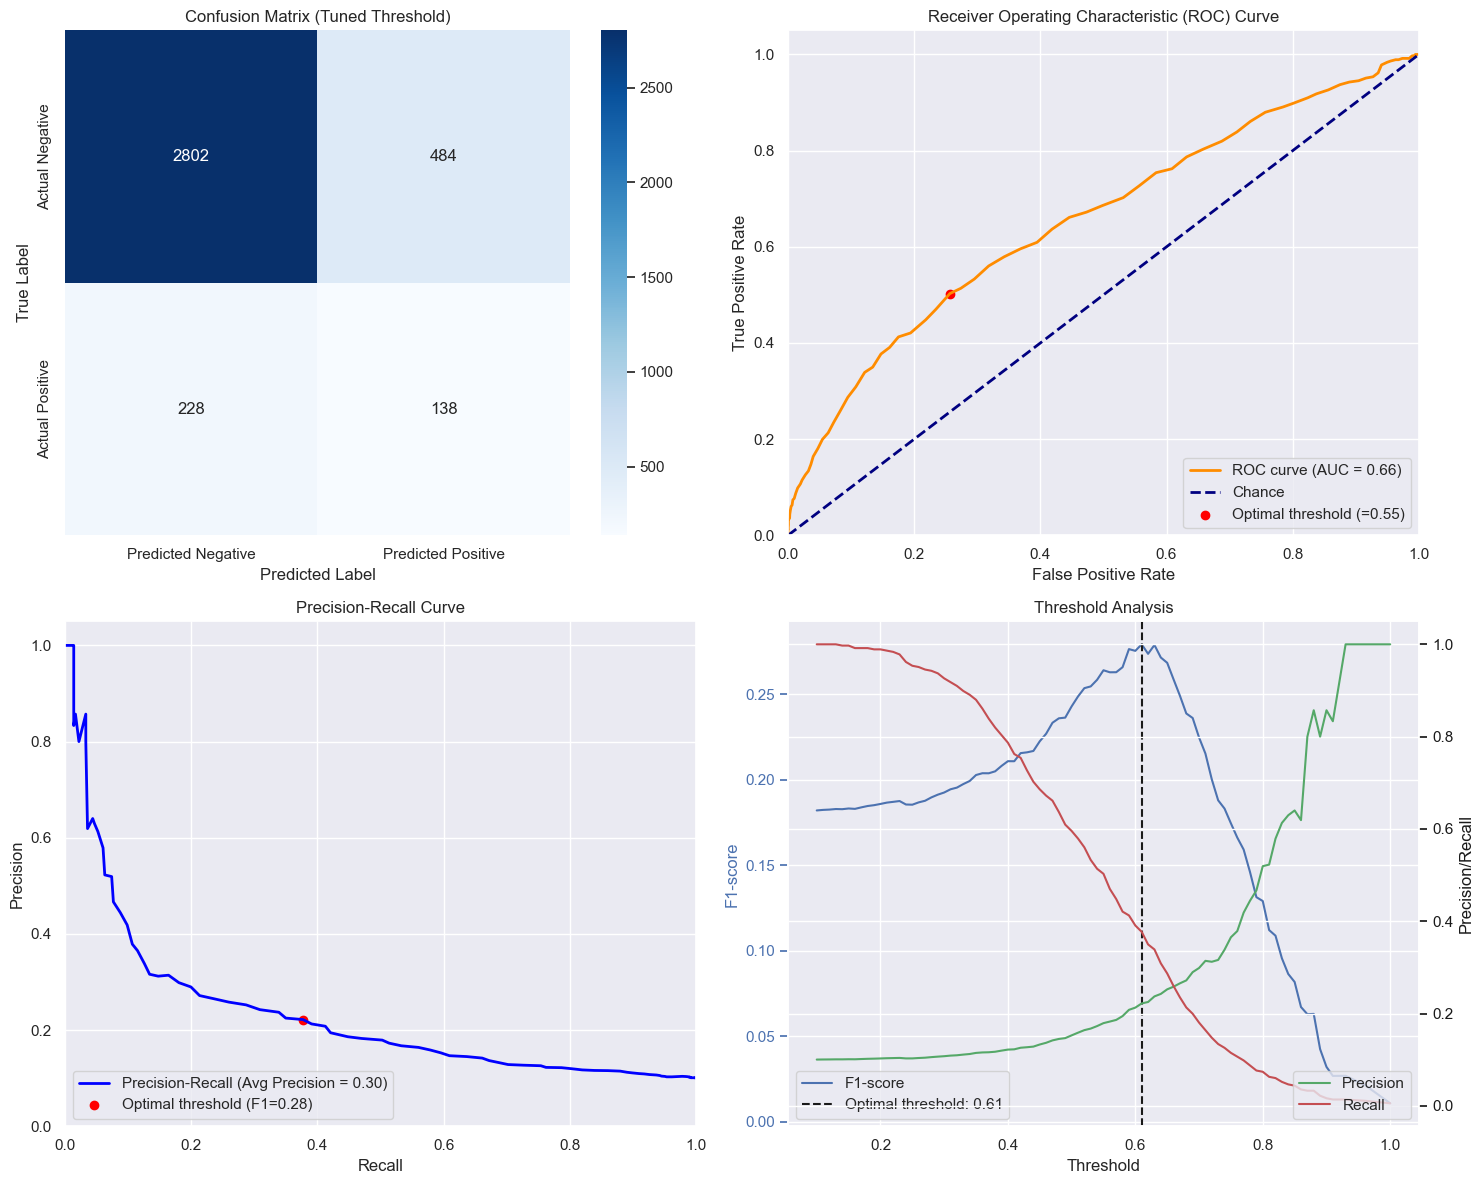


Threshold Comparison:
   Threshold   TP    FP    TN   FN  Precision  Recall     F1
0       0.10  366  3286     0    0      0.100   1.000  0.182
1       0.20  362  3165   121    4      0.103   0.989  0.186
2       0.30  339  2814   472   27      0.108   0.926  0.193
3       0.40  288  2076  1210   78      0.122   0.787  0.211
4       0.50  218  1210  2076  148      0.153   0.596  0.243
5       0.61  138   484  2802  228      0.222   0.377  0.279


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (classification_report, f1_score, precision_recall_curve, 
                            confusion_matrix, roc_curve, auc, RocCurveDisplay)
from tqdm import tqdm
from sklearn.inspection import permutation_importance

# Convert all data to numpy arrays to avoid indexing issues
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# Initialize variables for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = []
best_thresholds = []

print("Starting cross-validation...")
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_np, y_train_np)):
    print(f"Processing fold {fold+1}/10")
    
    # Split data for this fold using numpy arrays
    X_fold_train, X_fold_val = X_train_np[train_idx], X_train_np[val_idx]
    y_fold_train, y_fold_val = y_train_np[train_idx], y_train_np[val_idx]
    
    # Train Balanced Random Forest
    brf = BalancedRandomForestClassifier(
        n_estimators=100,
        random_state=42,
        bootstrap=True,
        sampling_strategy='auto',
        replacement=False,
        oob_score=True  # Enable OOB score estimation
    )
    brf.fit(X_fold_train, y_fold_train)
    
    # Get validation set predictions for threshold tuning
    val_proba = brf.predict_proba(X_fold_val)[:, 1]  # Probability of positive class
    
    # Find optimal threshold for F1 score
    precision, recall, thresholds = precision_recall_curve(y_fold_val, val_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.nanargmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_thresholds.append(best_threshold)
    
    # Make predictions with optimal threshold
    y_pred_val = (val_proba >= best_threshold).astype(int)
    fold_f1 = f1_score(y_fold_val, y_pred_val, average="binary")
    cv_scores.append(fold_f1)
    
    print(f"Fold {fold+1} - Best threshold: {best_threshold:.3f}, F1-score: {fold_f1:.3f}")

print(f"\nCross-validation completed. Average F1-score: {np.mean(cv_scores):.3f}")

# Train final model on all training data
print("\nTraining final model on all training data...")
final_brf = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42,
    bootstrap=True,
    sampling_strategy='auto',
    replacement=False,
    oob_score=True
)
final_brf.fit(X_train_np, y_train_np)

# Use average threshold from cross-validation
final_threshold = np.mean(best_thresholds)
print(f"Using average optimal threshold: {final_threshold:.3f}")

# Make predictions on test set with optimal threshold
test_proba = final_brf.predict_proba(X_test_np)[:, 1]
y_pred_tuned = (test_proba >= final_threshold).astype(int)

# Evaluate
print("\nEnhanced Balanced Random Forest with Threshold Tuning:")
print(classification_report(y_test_np, y_pred_tuned, digits=3))

# For comparison, show standard predictions
standard_preds = final_brf.predict(X_test_np)
print("\nStandard Balanced Random Forest (for comparison):")
print(classification_report(y_test_np, standard_preds, digits=3))

# Feature importance analysis
print("\nCalculating feature importance...")
# Create a validation set from test data for permutation importance
X_test_temp, X_val_temp, y_test_temp, y_val_temp = train_test_split(
    X_test_np, y_test_np, test_size=0.3, stratify=y_test_np, random_state=42
)

result = permutation_importance(
    final_brf, X_val_temp, y_val_temp, 
    scoring="f1", 
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)
feature_weights = result.importances_mean
feature_weights = np.maximum(feature_weights, 0)  # Ensure non-negative
if feature_weights.sum() > 0:
    feature_weights /= feature_weights.sum()

print("Top 10 most important features:")
# If we have feature names from the original data
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_weights
    })
    print(feature_importance_df.sort_values('importance', ascending=False).head(10))
else:
    # If we don't have feature names
    top_10_idx = np.argsort(feature_weights)[-10:][::-1]
    for i, idx in enumerate(top_10_idx):
        print(f"{i+1}. Feature {idx}: {feature_weights[idx]:.4f}")

# Additional: Try different thresholds to find the best one for the final model
print("\nFinding optimal threshold for final model...")
final_val_proba = final_brf.predict_proba(X_val_temp)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val_temp, final_val_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.nanargmax(f1_scores)
best_threshold_final = thresholds[best_idx]

print(f"Optimal threshold on validation set: {best_threshold_final:.3f}")
y_pred_final_tuned = (test_proba >= best_threshold_final).astype(int)

print("\nFinal Model with Validation-set Optimized Threshold:")
print(classification_report(y_test_np, y_pred_final_tuned, digits=3))

# =============================================================================
# ADDED: CONFUSION MATRIX AND ROC CURVE VISUALIZATIONS
# =============================================================================

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix for the tuned model
cm = confusion_matrix(y_test_np, y_pred_final_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
axes[0, 0].set_title('Confusion Matrix (Tuned Threshold)')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_np, test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0, 1].legend(loc="lower right")

# Mark the optimal threshold on the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_roc = thresholds[optimal_idx]
axes[0, 1].scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', 
                  label=f'Optimal threshold (={optimal_threshold_roc:.2f})')
axes[0, 1].legend(loc="lower right")

# 3. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test_np, test_proba)
avg_precision = np.mean(precision)
axes[1, 0].plot(recall, precision, color='blue', lw=2, 
               label=f'Precision-Recall (Avg Precision = {avg_precision:.2f})')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Mark the optimal threshold on the Precision-Recall curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx_pr = np.argmax(f1_scores)
axes[1, 0].scatter(recall[optimal_idx_pr], precision[optimal_idx_pr], marker='o', color='red',
                  label=f'Optimal threshold (F1={f1_scores[optimal_idx_pr]:.2f})')
axes[1, 0].legend(loc="lower left")

# 4. Threshold Analysis
axes[1, 1].plot(thresholds, f1_scores[:-1], 'b-', label='F1-score')
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('F1-score', color='b')
axes[1, 1].tick_params('y', colors='b')
axes[1, 1].set_title('Threshold Analysis')

# Add precision and recall to the same plot
ax2 = axes[1, 1].twinx()
ax2.plot(thresholds, precision[:-1], 'g-', label='Precision')
ax2.plot(thresholds, recall[:-1], 'r-', label='Recall')
ax2.set_ylabel('Precision/Recall', color='k')
ax2.tick_params('y', colors='k')

# Mark the optimal threshold
axes[1, 1].axvline(x=best_threshold_final, color='k', linestyle='--', 
                  label=f'Optimal threshold: {best_threshold_final:.2f}')
axes[1, 1].legend(loc='lower left')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

# =============================================================================
# ADDED: THRESHOLD COMPARISON TABLE
# =============================================================================

print("\nThreshold Comparison:")
thresholds_to_test = [0.1, 0.2, 0.3, 0.4, 0.5, best_threshold_final]
results = []

for threshold in thresholds_to_test:
    y_pred_thresh = (test_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_np, y_pred_thresh).ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    results.append({
        'Threshold': threshold,
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

results_df = pd.DataFrame(results)
print(results_df.round(3))